In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem
import numpy as np
import os

cpath = os.path.join('generated_data','clinicaltrial_data.csv')
mpath = os.path.join('generated_data','mouse_drug_data.csv')

In [4]:
clinical_data = pd.read_csv(cpath)
mouse_data = pd.read_csv(mpath)

In [13]:
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,x903,0,45.0,0
1,h124,0,45.0,0
2,p849,0,45.0,0
3,l726,0,45.0,0
4,a960,0,45.0,0


In [14]:
mouse_data.head()

,Mouse ID,Drug
0,x903,Stelasyn
1,u281,Stelasyn
2,w929,Stelasyn
3,a189,Stelasyn
4,y587,Stelasyn


In [75]:
df = pd.merge(clinical_data, mouse_data, on='Mouse ID', how='outer')
df = df.rename(columns={'Timepoint':'Time (days)'})
df.head()

,Mouse ID,Time (days),Tumor Volume (mm3),Metastatic Sites,Drug
0,x903,0,45.000000,0,Stelasyn
1,x903,5,45.722240,0,Stelasyn
2,x903,10,39.303044,0,Stelasyn
3,x903,15,38.279726,0,Stelasyn
4,x903,20,38.764771,0,Stelasyn


In [71]:
drug_list = df['Drug'].unique()
drug_list

array(['Stelasyn', 'Ketapril', 'Placebo', 'Capomulin', 'Naftisol',
       'Propriva', 'Ramicane', 'Zoniferol', 'Ceftamin', 'Infubinol'],
      dtype=object)

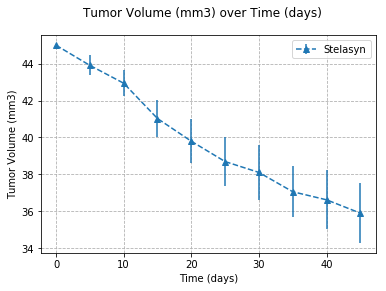

In [159]:
sdf = df.loc[df['Drug']=='Stelasyn']
sdf_mean = sdf['Tumor Volume (mm3)'].groupby(sdf['Time (days)']).mean()
sdf_error = sdf['Tumor Volume (mm3)'].groupby(sdf['Time (days)']).sem()
sdf_time = sdf['Time (days)'].unique()

plt.grid(linestyle='--')
plt.errorbar(sdf_time, sdf_mean, sdf_error, linestyle='--', marker='^')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.suptitle('Tumor Volume (mm3)'+' over '+'Time (days)')
plt.legend(['Stelasyn'])
plt.show()

In [160]:
def SD_plot (xdf, c, x, y):
    ls = xdf[c].unique()
    
    plt.figure(figsize=(9,6))  
    for i in ls:
        ldf = xdf.loc[xdf[c]==i]
        avg = ldf[y].groupby(ldf[x]).mean()
        err = ldf[y].groupby(ldf[x]).sem()
        time = ldf[x].unique()
        plt.grid(linestyle='--')
        plt.errorbar(time, avg, err, linestyle= '--', marker= '^')
    
    plt.xlabel(x)
    plt.xticks(time)
    plt.ylabel(y)
    plt.suptitle(y+' over '+x)
    plt.legend(ls)
    plt.show()

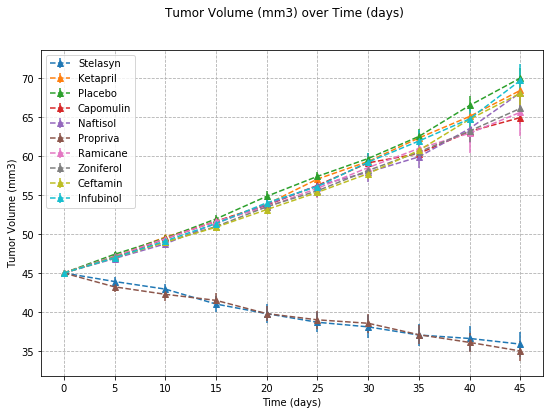

In [161]:
SD_plot (df, 'Drug', 'Time (days)','Tumor Volume (mm3)')

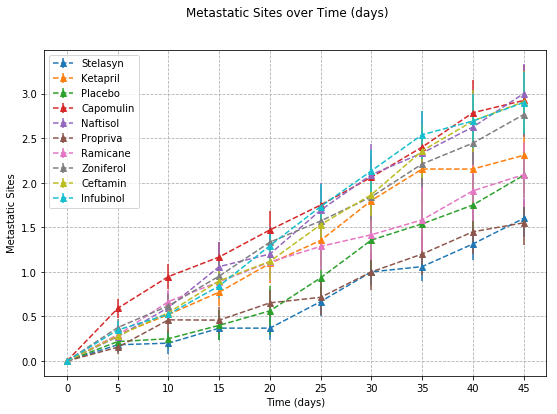

In [162]:
SD_plot (df, 'Drug', 'Time (days)','Metastatic Sites')

In [163]:
def plot (xdf, c, x, y):
    ls = xdf[c].unique()
    
    plt.figure(figsize=(9,6))  
    for i in ls:
        ldf = xdf.loc[xdf[c]==i]
        cont = ldf[y].groupby(ldf[x]).count()
        time = ldf[x].unique()
        plt.grid(linestyle='--')
        plt.plot(time, cont, linestyle= '--', marker= '^')
    
    plt.xlabel(x)
    plt.xticks(time)
    plt.ylabel(y)
    plt.suptitle(y+' count over '+x)
    plt.legend(ls)
    plt.show()
        

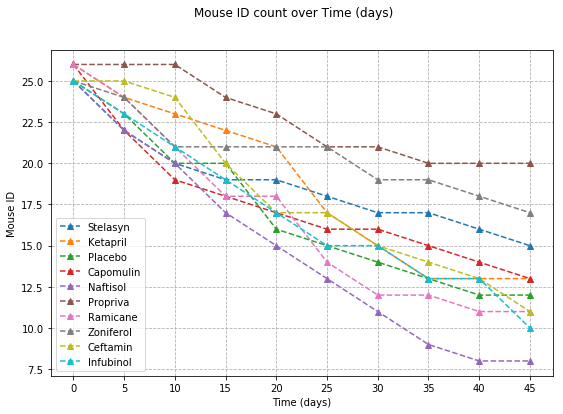

In [164]:
plot (df, 'Drug', 'Time (days)','Mouse ID')

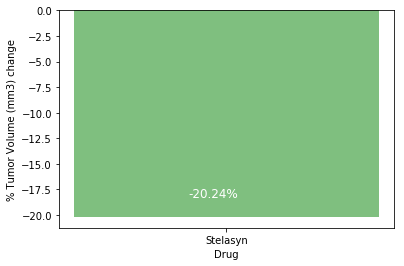

In [370]:
tc=[]
st_df = df.loc[df['Drug'] == 'Stelasyn']
sg_df = st_df['Tumor Volume (mm3)'].groupby(st_df['Time (days)']).mean()
sg_df[len(sg_df)]
t = st_df['Time (days)'].unique()
p = (( sg_df[t[len(t)-1]] - sg_df[t[0]] ) / sg_df[t[0]]) * 100
tc.append(p)

if tc[0] < 0:
    color = "green"
else:
    color = "red"
    
plt.bar(['Stelasyn'],tc,color=color, alpha=0.5, align="edge")
ticks=[name+0.4 for name in [0]]
plt.xticks(ticks,['Stelasyn'])
plt.xlabel('Drug')
plt.ylabel('% '+'Tumor Volume (mm3)'+' change')
x_axis = [0]
for i in x_axis:
    plt.text(i+0.3, tc[i]*.9, '{:.2f}%'.format(p),fontsize=12, color='white')


In [379]:
def barr (xdf, c, x, y):
    ls = xdf[c].unique()
    pc =[]
    colors=[]
    
    for i in ls:
        ldf = xdf.loc[xdf[c]==i]
        avg = ldf[y].groupby(ldf[x]).mean()
        t = ldf[x].unique()
        p = (( avg[t[len(t)-1]] - avg[t[0]] ) / avg[t[0]]) * 100
        pc.append(p)
        if p < 0:
            colors.append('green')
        else:
            colors.append('red')
  
    plt.figure(figsize=(15,6))
    plt.suptitle(c+'- % '+ y +' change', fontsize=14, fontweight='bold')
    x_axis = np.arange(0,len(ls),1)
    for j in x_axis:
        plt.text(j+0.1, pc[j]*0.9, '{:.2f}%'.format(pc[j]),fontsize=12, color='white')
    plt.bar(x_axis, pc,color=colors, alpha=0.5, align="edge")
    ticks=[i+0.4 for i in x_axis]
    
    plt.xticks(ticks,ls)
    plt.grid(linestyle='--', alpha=0.5)
    plt.axhline(0, color='black')
    plt.xlabel(c, fontsize=13)
    plt.ylabel('% '+ y +' change', fontsize=13)
    plt.show()

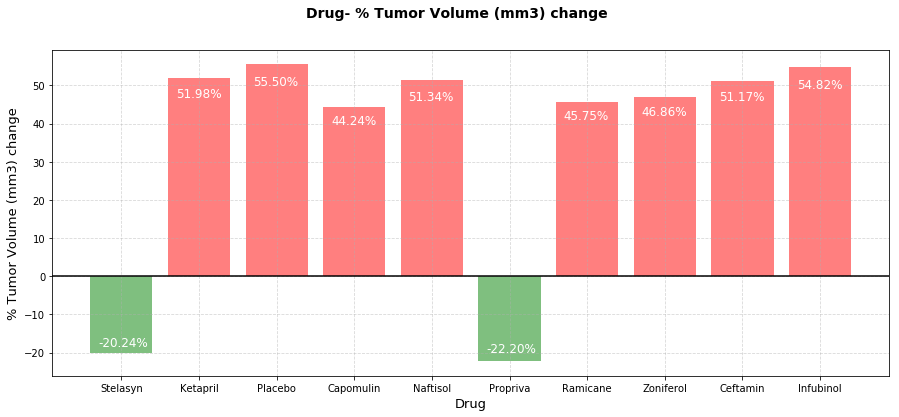

In [380]:
barr(df,'Drug','Time (days)','Tumor Volume (mm3)')